<a href="https://colab.research.google.com/github/Esther1115/Graphene-MNIST/blob/main/hBN-grpahene-GNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch_geometric

In [ ]:
pip install torchmetrics

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
#!ls /gdrive/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!nvidia-smi

Mon Jul 10 22:31:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    33W /  70W |   1187MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Selection of labels by chemical species

In [ ]:
def element_num(ele):
  if ele == 'C':
    atnume = 6.
  elif ele == 'B':
    atnume = 5.
  else:
    atnume = 7.
  return int(atnume)


Database creation

In [ ]:
import os
import glob
import numpy as np
import torch
from torch_geometric.data.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.transforms import NormalizeScale
from sklearn.model_selection import train_test_split


def load_data(data_file):
  data_list = torch.load(data_file)
  return data_list

def make_loaders(data_list,data_size=0.1,test_size=0.2,bsize=5):
    sizeofdata = 1.0 - data_size
    # Split data into training and test sets

    tmpdata1, tmpdata2 = train_test_split(data_list, test_size = sizeofdata)
    train_data, test_data = train_test_split(tmpdata1, test_size=test_size)

    # Create data loaders for training and test sets
    train_loader = DataLoader(train_data, batch_size=bsize, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=bsize, shuffle=False)


    return train_loader, test_loader


CNN architectures

https://pytorch-geometric.readthedocs.io/en/latest/cheatsheet/gnn_cheatsheet.html

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.utils import softmax
from torch.nn import Sequential, Linear, ReLU
from torch_geometric.nn import global_mean_pool
from torch_geometric.nn import GraphConv, GCNConv, CGConv, ResGatedGraphConv, ResGatedGraphConv, NNConv
from torch_geometric.nn import ChebConv, SAGEConv, GATConv, GATv2Conv, TransformerConv, SimpleConv,  SGConv

#Red SGConv
class SGC(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(SGC, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = SGConv(num_features, 16)
        self.conv2 = SGConv(16, 32)
        self.conv3 = SGConv(32, 64)
        self.conv4 = SGConv(64, 128)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        #x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)

        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)

        return x.reshape(-1)


#Red SimpleConv
class Simple(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(Simple, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = SimpleConv(num_features, 16)
        self.conv2 = SimpleConv(16, 32)
        self.conv3 = SimpleConv(32, 64)
        self.conv4 = SimpleConv(64, 128)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        x = self.lin1(x).relu()
        #x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        return x.reshape(-1)


#Red GrapConv
class Graph(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(Graph, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = GraphConv(num_features, 16)
        self.conv2 = GraphConv(16, 32)
        self.conv3 = GraphConv(32, 64)
        self.conv4 = GraphConv(64, 128)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        #x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        #x = x.relu()
        return x.reshape(-1)

#Red GATConv
class Gat(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(Gat, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = GATConv(num_features, 16)
        self.conv2 = GATConv(16, 32)
        self.conv3 = GATConv(32, 64)
        self.conv4 = GATConv(64, 128)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        #x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        #x = x.relu()
        return x.reshape(-1)

#Red SAGE
class Sage(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(Sage, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = SAGEConv(num_features, 16)
        self.conv2 = SAGEConv(16, 32)
        self.conv3 = SAGEConv(32, 64)
        self.conv4 = SAGEConv(64, 128)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        #x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        #x = x.relu()
        return x.reshape(-1)

#Red GCNConv
class GCN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GCN, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = GCNConv(num_features, 16)
        self.conv2 = GCNConv(16, 32)
        self.conv3 = GCNConv(32, 64)
        self.conv4 = GCNConv(64, 128)
        #  self.lin1 = Linear(128, 128)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        #  x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        #x = x.relu()
        return x.reshape(-1)

# Red ChebConv
class Cheb(torch.nn.Module):
    def __init__(self, num_features, num_classes,la_k=3):
        super(Cheb, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = ChebConv(num_features, 16,la_k)
        self.conv2 = ChebConv(16, 32,la_k)
        self.conv3 = ChebConv(32, 64,la_k)
        self.conv4 = ChebConv(64, 128,la_k)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        #x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        #x = x.relu()
        return x.reshape(-1)

#Red ResGatedGraphConv
class ResGated(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(ResGated, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = ResGatedGraphConv(num_features,16)
        self.conv2 = ResGatedGraphConv(16,32)
        self.conv3 = ResGatedGraphConv(32,64)
        self.conv4 = ResGatedGraphConv(64,128)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        #x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        #x = x.relu()
        return x.reshape(-1)


#red   TransformerConv
class Trans2(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(Trans2, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = TransformerConv(num_features, 16)
        self.conv2 = TransformerConv(16, 32)
        self.conv3 = TransformerConv(32, 64)
        self.conv4 = TransformerConv(64, 128)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index,batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        #x = self.lin1(x).relu()
        x = global_mean_pool(x, batch)
        #x = F.dropout(x,p=0.5, training=self.training)
        x = self.lin2(x)
        #x = x.relu()
        return x.reshape(-1)



#---------++++++++++ MODELS THAT USU EDGE_ATTR +++++++++----------#

#Red GATv2Conv
class GatV2(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GatV2, self).__init__()
        self.conv1 = GATv2Conv(num_features, 16,edge_dim=1)
        self.conv2 = GATv2Conv(16, 32,edge_dim=1)
        self.conv3 = GATv2Conv(32, 64,edge_dim=1)
        self.conv4 = GATv2Conv(64, 128,edge_dim=1)
        #self.lin1 = Linear(128, 64)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, edge_attr, batch):
        x = self.conv1(x, edge_index,edge_attr).relu()
        x = self.conv2(x, edge_index,edge_attr).relu()
        x = self.conv3(x, edge_index,edge_attr).relu()
        x = self.conv4(x, edge_index,edge_attr).relu()
        x = global_mean_pool(x, batch)
        x = self.lin2(x)
        return x.reshape(-1)

#Red GATv2Conv
class GatV2_2(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GatV2_2, self).__init__()
        self.conv1 = GATv2Conv(num_features, 16,edge_dim=1)
        self.conv2 = GATv2Conv(16, 32,edge_dim=1)
        self.conv3 = GATv2Conv(32, 64,edge_dim=1)
        self.conv4 = GATv2Conv(64, 128,edge_dim=1)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index).relu()
        x = self.conv3(x, edge_index).relu()
        x = self.conv4(x, edge_index).relu()
        x = global_mean_pool(x, batch)
        x = self.lin2(x)
        return x.reshape(-1)

#red   TransformerConv
class Trans(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(Trans, self).__init__()
        #torch.manual_seed(12345)
        self.conv1 = TransformerConv(num_features, 16,edge_dim=1)
        self.conv2 = TransformerConv(16, 32,edge_dim=1)
        self.conv3 = TransformerConv(32, 64,edge_dim=1)
        self.conv4 = TransformerConv(64, 128,edge_dim=1)
        self.lin2 = Linear(128, num_classes)

    def forward(self, x, edge_index, edge_attr, batch):
        x = self.conv1(x, edge_index,edge_attr).relu()
        x = self.conv2(x, edge_index,edge_attr).relu()
        x = self.conv3(x, edge_index,edge_attr).relu()
        x = self.conv4(x, edge_index,edge_attr).relu()
        x = global_mean_pool(x, batch)
        x = self.lin2(x)
        return x.reshape(-1)





In [ ]:
import torch
import torch.nn.functional as F
import torchmetrics as tm
#-197.154032 Kcal/mol /atom Max energy


def train(model, train_loader, eval_loader, optimizer, n_epoch=10, opt=1):
  mae = tm.MeanAbsoluteError().to(device)
  mse = tm.MeanSquaredError().to(device)
  ep = []
  l_tr = []
  l_te = []
  mse_training = []
  mse_eval = []
  for epoch in range(n_epoch):
    model.train()
    loss_all = 0
    pred_t = []
    real_t = []
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        if opt == 1:
          out = model(data.x, data.edge_index, data.batch)
        else:
          out = model(data.x, data.edge_index, data.edge_attr, data.batch)
        loss = F.mse_loss(out[:-1:5], data.y[:-1:5]) #.view(-1, 1))
        pred_t.extend(out.tolist())
        real_t.extend(data.y.tolist())
        loss.backward()
        optimizer.step()
        loss_all += loss.item()#  *len(data.y) # * data.num_graphs
    pred_tT=torch.Tensor(pred_t)
    real_tT=torch.Tensor(real_t)
    mse_tr=mse(pred_tT[:-1:5], real_tT[:-1:5]).detach().cpu().numpy()


    model.eval()
    eval_loss = 0
    pred = []
    real = []

    with torch.no_grad():
      for dato in eval_loader:
         dato = dato.to(device)
         if opt == 1:
          out = model(dato.x, dato.edge_index, dato.batch)
         else:
          out = model(dato.x, dato.edge_index, dato.edge_attr, dato.batch)

         loss = F.mse_loss(out[:-1:5], dato.y[:-1:5])
         eval_loss += loss.item()#* len(dato.y)
         pred.extend(out.tolist())
         real.extend(dato.y.tolist())

    predT=torch.Tensor(pred)
    realT=torch.Tensor(real)
    mse_te = mse(predT[:-1:5], realT[:-1:5]).detach().cpu().numpy()
    print('Epoch:',epoch, loss_all / len(train_loader),eval_loss / len(eval_loader), mse_tr, mse_te)
    ep.append(epoch)
    l_tr.append(loss_all / len(train_loader))
    l_te.append(eval_loss / len(eval_loader))
    mse_training.append(mse_tr)
    mse_eval.append(mse_te)
  return (ep, l_tr, l_te, mse_training, mse_eval)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
data_l_tr = load_data('/gdrive/MyDrive/Colab Notebooks/data-new-1-40000.pth')
data_l_ev = load_data('/gdrive/MyDrive/Colab Notebooks/data-new-40001-60000.pth')
data_r = load_data('/gdrive/MyDrive/Colab Notebooks/data-REDUCIDO-1-40000.pth') # removerla


In [ ]:
##### Esta línea renueva el conjunto de datos con el que estás trabajando
#(NO EJECUTAR) si quieres probar modificaciones al modelo y utilizar el
#mismo conjunto, es decir, probar solo el efecto de cambios en el modelo


train_loader, test_loader = make_loaders(data_l_tr, data_size = 0.075,test_size=0.33,bsize=64)
eval_loader1, eval_loader2 = make_loaders(data_l_ev, data_size = 0.2,test_size=0.5,bsize=64)
#train_loader_r, test_loader_r = make_loaders(data_r, data_size = 0.075,test_size=0.33,bsize=64)

### SI ya estás conforme con el modelo y quieres probarlo con distintos conjuntos de datos,
# pos lo ejecutas

Select option =  1 if CNN models use edge_attr else option = 2

In [ ]:
option=1

Epoch: 0 0.8913497608155012 0.7904604356735945 0.89321715 0.7906179
Epoch: 1 0.6905626896768808 0.5839748606085777 0.6923761 0.5838625
Epoch: 2 0.4814462410286069 0.3769576521590352 0.4833564 0.3769004
Epoch: 3 0.2835058649070561 0.19148725969716907 0.28525427 0.19141695
Epoch: 4 0.12115828483365476 0.05984969169367105 0.12220816 0.05991735
Epoch: 5 0.027634265570668504 0.006871493736980483 0.028030088 0.0068582436
Epoch: 6 0.0024977403354569105 0.0008447259069725988 0.002524075 0.00085428526
Epoch: 7 0.0009548915240884526 0.0008346153372258414 0.0009550559 0.00083571
Epoch: 8 0.0009371326959808357 0.0008230903094954556 0.0009371061 0.00082623167
Epoch: 9 0.0009236095884261886 0.0008173907299351413 0.0009261806 0.0008135969
Epoch: 10 0.0009135662712651538 0.0008154786864906782 0.00091702933 0.00080895744
Epoch: 11 0.0009114809308812255 0.0007990421399881598 0.00090632506 0.0007964869
Epoch: 12 0.0008987206747406162 0.0007898256571934326 0.0008966402 0.0007920244
Epoch: 13 0.00089210182

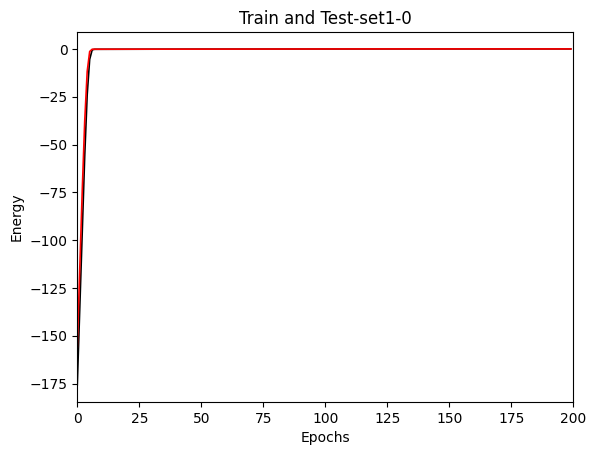

Test Loss: 6.582427388934775e-06
Test Loss: 6.366757162368231e-06
Test Loss: 6.531881396654171e-06


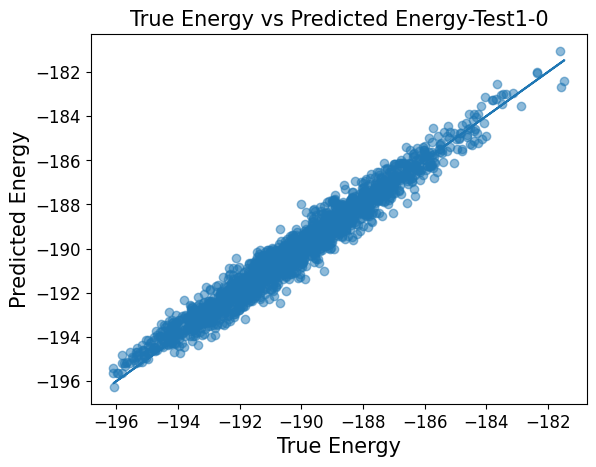

Test Loss: 6.366749929043181e-06


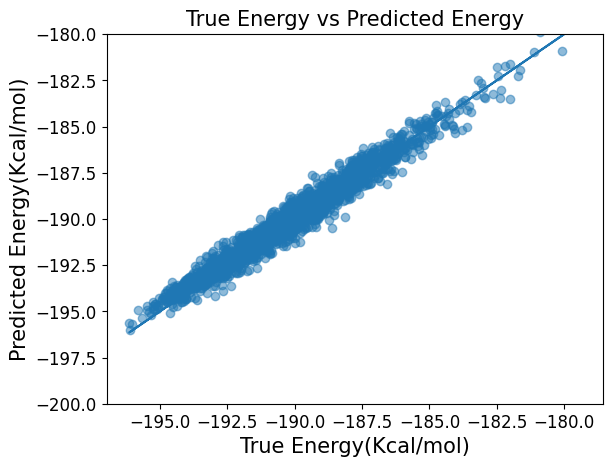

Test Loss: 4.7171162691483914e-06


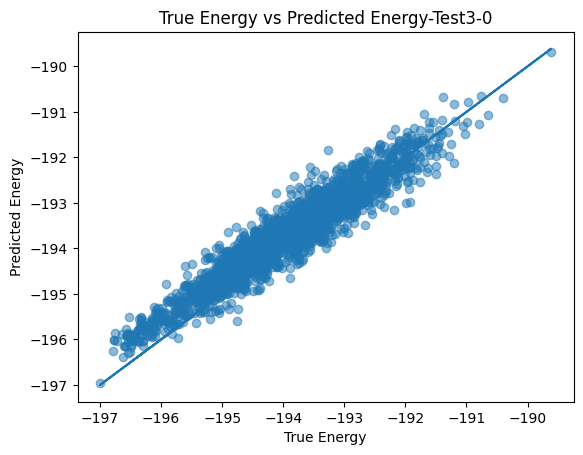

[0.8913497608155012, 0.6905626896768808, 0.4814462410286069, 0.2835058649070561, 0.12115828483365476, 0.027634265570668504, 0.0024977403354569105, 0.0009548915240884526, 0.0009371326959808357, 0.0009236095884261886, 0.0009135662712651538, 0.0009114809308812255, 0.0008987206747406162, 0.0008921018288674532, 0.0008742229201743612, 0.0008802091160760028, 0.0008592384310759371, 0.0008451405283267377, 0.0008345735568582313, 0.0008277460001409054, 0.000821812584035797, 0.0008206226593756583, 0.0008045835966186132, 0.0007932671524031321, 0.0007849648900446482, 0.0007755878741591005, 0.0007651998766959878, 0.0007524195789301302, 0.0007455061568180099, 0.0007362746573562617, 0.0007200571926659904, 0.0007094488082657335, 0.0007007680560491281, 0.0006963231608096976, 0.0006799334896641085, 0.0006684739510092186, 0.0006556688140335609, 0.0006480619003923493, 0.0006341529233395704, 0.0006305136375885922, 0.0006171086179165286, 0.0006034410471329466, 0.000591342790357885, 0.0005806766048408463, 0.00

In [ ]:
import matplotlib.pyplot as plt
import statistics
import numpy

m=[]
n=[]
j=[]

for i in range(0,1):
  ##Select parameter for data_size, test_site and bacht size
  train_loader, test_loader = make_loaders(data_l_tr, data_size = 0.075,test_size=0.33,bsize=64)
  eval_loader1, eval_loader2 = make_loaders(data_l_ev, data_size = 0.2,test_size=0.5,bsize=64)
  train_loader_r, test_loader_r = make_loaders(data_r, data_size = 0.075,test_size=0.33,bsize=64)

##Select model and choose number of Epoch
  n_ep = 200
  #model = Graph(1,5).to(device) #si
  #model = GCN(1,5).to(device) #si
  #model = Sage(1,5).to(device)
  #model = CuSage(1,5).to(device)
  #model = Gat(1,5).to(device) #si
  #model = Cheb(1,5,la_k=1).to(device)
  #model = ResGated(1,5).to(device) #si
  #model = GatV2(1,5).to(device)
  #model = Trans2(1,5).to(device) #si
  #model =Simple(1,5).to(device)
  #model = Trans(1,5).to(device) #No
  model = SGC(1,5).to(device) #si

  optimizer = torch.optim.AdamW(model.parameters(), lr=0.0001)
  ep, l_tr, l_te, mse_tr, mse_te = train(model,train_loader,eval_loader1,optimizer,n_epoch=n_ep, opt=option)

# Train and Test Graphs vs Epoch
  l_tr2 = numpy.multiply(l_tr,-197.154032 )
  l_te2 = numpy.multiply(l_te,-197.154032 )
  plt.plot(ep,l_tr2,linewidth=1.2,color='black')
  plt.plot(ep,l_te2,linewidth=1.2,color='red')
  #plt.plot(ep,mse_tr,linewidth=0.6,color='green')
  #plt.plot(ep,mse_te,linewidth=0.6,color='orange')
  plt.xlabel('Epochs')
  plt.ylabel('Energy')
  plt.title('Train and Test-set1-' + str(i))
  plt.xlim([0, n_ep])
  plt.show()



  model.eval()
  eval_loss = 0
  with torch.no_grad():
      for data in eval_loader1:
          data = data.to(device)
          if option == 1:
            out = model(data.x, data.edge_index, data.batch)
          else:
            out = model(data.x, data.edge_index, data.edge_attr, data.batch)
          loss = F.mse_loss(out[:-1:5], data.y[:-1:5])
          eval_loss += loss.item()
  print(f"Test Loss: {eval_loss / len(eval_loader1)}")

  model.eval()
  eval_loss = 0
  with torch.no_grad():
      for data in eval_loader2:
          data = data.to(device)
          if option == 1:
             out = model(data.x, data.edge_index, data.batch)
          else:
            out = model(data.x, data.edge_index, data.edge_attr, data.batch)
          loss = F.mse_loss(out[:-1:5], data.y[:-1:5])
          eval_loss += loss.item()
  print(f"Test Loss: {eval_loss / len(eval_loader2)}")


  #### grafica traint
  model.eval()
  eval_loss = 0
  true_energies = []
  predicted_energies = []
  with torch.no_grad():
      correct = 0
      for data in eval_loader1:
          data = data.to(device)
          if option == 1:
            out = model(data.x, data.edge_index, data.batch)
          else:
            out = model(data.x, data.edge_index, data.edge_attr, data.batch)
          loss = F.mse_loss(out[:-1:5], data.y[:-1:5])
          eval_loss += loss.item()
          true_energies.extend(data.y.tolist())
          predicted_energies.extend(out.tolist())


  true_energies2 = numpy.multiply(true_energies,-197.154032 )
  predicted_energies2 = numpy.multiply(predicted_energies,-197.154032 )
  print(f"Test Loss: {eval_loss / len(eval_loader1)}")
  plt.scatter(true_energies2[:-1:5], predicted_energies2[:-1:5], alpha=0.5)
  plt.plot(true_energies2[:-1:5],true_energies2[:-1:5])
  plt.xlabel('True Energy', fontsize =15)
  plt.ylabel('Predicted Energy', fontsize =15)
  plt.title('True Energy vs Predicted Energy-Test1-' + str(i), fontsize =15)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.show()

# Test graph
  model.eval()
  eval_loss = 0
  true_energies = []
  predicted_energies = []
  with torch.no_grad():
      correct = 0
      for data in eval_loader2:
          data = data.to(device)
          if option == 1:
            out = model(data.x, data.edge_index, data.batch)
          else:
            out = model(data.x, data.edge_index, data.edge_attr, data.batch)
          loss = F.mse_loss(out[:-1:5], data.y[:-1:5])
          eval_loss += loss.item()
          true_energies.extend(data.y.tolist())
          predicted_energies.extend(out.tolist())

  true_energies2 = numpy.multiply(true_energies,-197.154032 )
  predicted_energies2 = numpy.multiply(predicted_energies,-197.154032 )
  print(f"Test Loss: {eval_loss / len(eval_loader2)}")
  plt.scatter(true_energies2[:-1:5], predicted_energies2[:-1:5], alpha=0.5)
  plt.plot(true_energies2[:-1:5],true_energies2[:-1:5])
  plt.xlabel('True Energy(Kcal/mol)', fontsize =15)
  plt.ylabel('Predicted Energy(Kcal/mol)', fontsize =15)
  plt.title('True Energy vs Predicted Energy', fontsize =15)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.ylim([-200, -180])
  plt.ylim([-200, -180])
  plt.show()

 #### Validation graph
  loader=train_loader_r
  model.eval()
  eval_loss = 0
  true_energies = []
  predicted_energies = []
  with torch.no_grad():
      correct = 0
      for data in loader:
          data = data.to(device)
          if option == 1:
            out = model(data.x, data.edge_index, data.batch)
          else:
             out = model(data.x, data.edge_index, data.edge_attr, data.batch)
          loss = F.mse_loss(out[:-1:5], data.y[:-1:5])
          eval_loss += loss.item()
          true_energies.extend(data.y.tolist())
          predicted_energies.extend(out.tolist())


  true_energies2 = numpy.multiply(true_energies,-197.154032 )
  predicted_energies2 = numpy.multiply(predicted_energies,-197.154032 )
  print(f"Test Loss: {eval_loss / len(loader)}")
  #print(true_energies[:-1:5])
  plt.scatter(true_energies2[:-1:5], predicted_energies2[:-1:5], alpha=0.5)
  plt.plot(true_energies2[:-1:5],true_energies2[:-1:5])
  plt.xlabel('True Energy')
  plt.ylabel('Predicted Energy')
  plt.title('True Energy vs Predicted Energy-Test3-' + str(i))
  plt.show()

  j= l_tr + j
mean = statistics.mean(j)
print(l_tr)
print(m)
print(f'promedio de l_tr' +str(mean))



